<a href="https://colab.research.google.com/github/kannankumar/jupyter-notebooks/blob/hindi-digit-gan/Hindi_Character_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hindi Character CNN

#### Classifying Images of Handwritten Hindi characters

---

In this notebook, I train a CNN to classify images from a subset of the Devanagiri Dataset. This dataset contains both characters and numerals of the Devanigiri script.


**Characters**  

Here is a cheatsheet of how the characters look like (*in bold*) and how to pronounce them(*with phonetics in square bracket for those interested*):
![Hindi Character](https://i.imgur.com/9ABeuwB.png)  

**Digits**  

And here are how the numeric digits(0-9) look like (*first row*), their pronounciation (*second row*) and the decimal equivalent (*last row*):
![Hindi Digits](https://i.imgur.com/Ck4r3uG.png)


The character shown above are printed characters for reference. The dataset I used is handwritten and looks less clean.  
I use both the characters and digits for our Hindi character classification.

---------
**Footnote**

Devanagiri is the script used for languages like Hindi, Nepali and most of Sanskrit.

### 0. Download Dataset and Extract Devanagiri Character Images
[UCI Machine Learning Repository]((http://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset)) hosts this dataset.  
So I'll be downloading it from there.

In [0]:
%%bash
wget -q http://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
unzip -q DevanagariHandwrittenCharacterDataset.zip

In [4]:
import fnmatch
import os
import shutil

root_dir='DevanagariHandwrittenCharacterDataset'

def count_characters(dir_path):
  
  print(dir_path, 'Directory Details:')
  counts = {dr: len(os.listdir(os.path.join(dir_path, dr))) for dr in sorted(os.listdir(dir_path))}
  return counts

train_counts = count_characters(os.path.join(root_dir, 'Train'))
print(train_counts)
test_counts = count_characters(os.path.join(root_dir, 'Test'))
print(test_counts)

DevanagariHandwrittenCharacterDataset/Train Directory Details:
{'character_10_yna': 1700, 'character_11_taamatar': 1700, 'character_12_thaa': 1700, 'character_13_daa': 1700, 'character_14_dhaa': 1700, 'character_15_adna': 1700, 'character_16_tabala': 1700, 'character_17_tha': 1700, 'character_18_da': 1700, 'character_19_dha': 1700, 'character_1_ka': 1700, 'character_20_na': 1700, 'character_21_pa': 1700, 'character_22_pha': 1700, 'character_23_ba': 1700, 'character_24_bha': 1700, 'character_25_ma': 1700, 'character_26_yaw': 1700, 'character_27_ra': 1700, 'character_28_la': 1700, 'character_29_waw': 1700, 'character_2_kha': 1700, 'character_30_motosaw': 1700, 'character_31_petchiryakha': 1700, 'character_32_patalosaw': 1700, 'character_33_ha': 1700, 'character_34_chhya': 1700, 'character_35_tra': 1700, 'character_36_gya': 1700, 'character_3_ga': 1700, 'character_4_gha': 1700, 'character_5_kna': 1700, 'character_6_cha': 1700, 'character_7_chha': 1700, 'character_8_ja': 1700, 'character_9

In [31]:
classes = ['_'.join(ch.split('_')[1:]) for ch in train_counts.keys()]
n_classes = len(classes)

print("Total classes: ", n_classes)
print(" | ".join(classes))

Total classes:  46
10_yna | 11_taamatar | 12_thaa | 13_daa | 14_dhaa | 15_adna | 16_tabala | 17_tha | 18_da | 19_dha | 1_ka | 20_na | 21_pa | 22_pha | 23_ba | 24_bha | 25_ma | 26_yaw | 27_ra | 28_la | 29_waw | 2_kha | 30_motosaw | 31_petchiryakha | 32_patalosaw | 33_ha | 34_chhya | 35_tra | 36_gya | 3_ga | 4_gha | 5_kna | 6_cha | 7_chha | 8_ja | 9_jha | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9


Clean up dataset artifacts that we won't need anymore.

In [0]:
!rm DevanagariHandwrittenCharacterDataset.zip

### 1. Load Images from Directory

In [14]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# create a data generator
datagen = ImageDataGenerator(rescale=1./255,)        # rescale [0,255] --> [0,1]
                            # width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
                            # height_shift_range=0.2)  # randomly shift images vertically (10% of total height))

# load and iterate training dataset
train_it = datagen.flow_from_directory(root_dir + '/Train/', target_size=(32,32), color_mode='grayscale', shuffle=True, 
                                       class_mode='categorical', batch_size=64)
# load and iterate test dataset
test_it = datagen.flow_from_directory(root_dir + '/Test/', target_size=(32,32), color_mode='grayscale', shuffle=True, 
                                      class_mode='categorical', batch_size=64)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


### 2. Visualize the First 24 Training Images

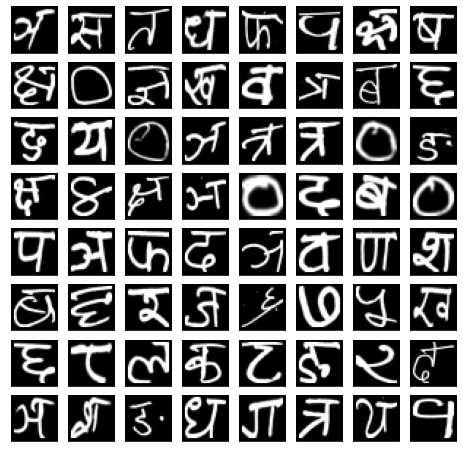

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_loader = iter(train_it)
images, _ = train_loader.next()  # loader keeps a tuple of (image,label)

fig = plt.figure(figsize=(8,8))
for i, img in enumerate(images):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(img), cmap='gray')

### 4.  Break Dataset into Training, Testing, and Validation Sets
[TODO]

### 5. Define the Model Architecture 

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 64)         

### 6. Compile the Model 

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [21]:
from keras.callbacks import ModelCheckpoint   

# checkpoint can only be used with validation accuracy. 
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

# train the model
hist = model.fit_generator(train_it, epochs=10, verbose=2, shuffle=True)


Epoch 1/10
 - 73s - loss: 0.8659 - accuracy: 0.7467
Epoch 2/10
 - 71s - loss: 0.2930 - accuracy: 0.9097
Epoch 3/10
 - 71s - loss: 0.2038 - accuracy: 0.9364
Epoch 4/10
 - 71s - loss: 0.1674 - accuracy: 0.9481
Epoch 5/10
 - 71s - loss: 0.1436 - accuracy: 0.9557
Epoch 6/10
 - 71s - loss: 0.1282 - accuracy: 0.9607
Epoch 7/10
 - 71s - loss: 0.1173 - accuracy: 0.9643
Epoch 8/10
 - 71s - loss: 0.1105 - accuracy: 0.9660
Epoch 9/10
 - 72s - loss: 0.1017 - accuracy: 0.9689
Epoch 10/10
 - 72s - loss: 0.0999 - accuracy: 0.9695


In [0]:
model.save('hindi_character_classification_model_v1.h5')

### 8. Load the Model with the Best Validation Accuracy
[TODO]

In [0]:
# load the weights that yielded the best validation accuracy
# TODO: split train generator to train and valid

# model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [23]:
# evaluate and print test accuracy
score = model.evaluate_generator(test_it, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 98.24637770652771


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
test_loader = iter(test_it)
test_images, test_labels = test_loader.next()
y_hat = model.predict(test_images)

In [0]:
# generate a random test set of images
random_test = np.random.choice(test_images.shape[0], size=32, replace=False)

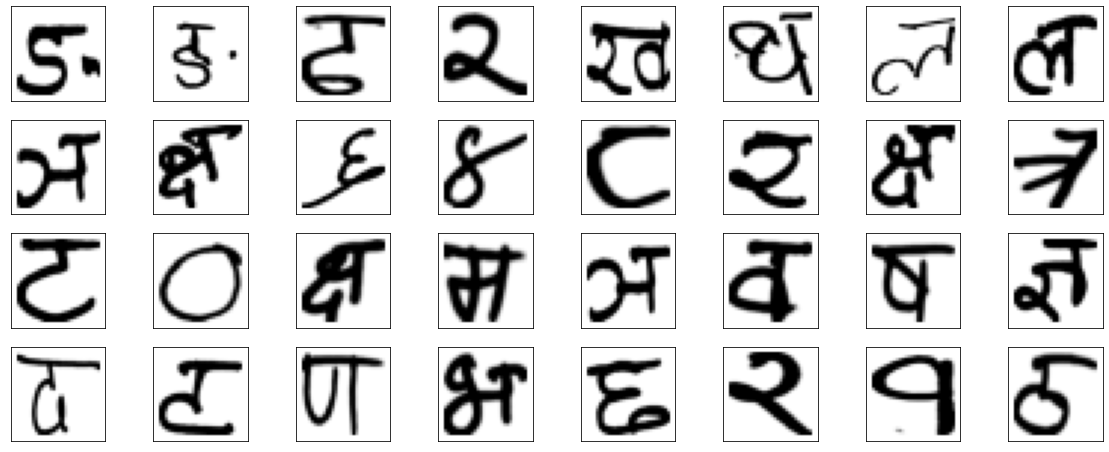

In [39]:
# plot a random sample of test images, 
# Use to this plot to try to guess myself first (Human baseline).
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_test):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]), cmap='binary')
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    # ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                #  color=("green" if pred_idx == true_idx else "red"))

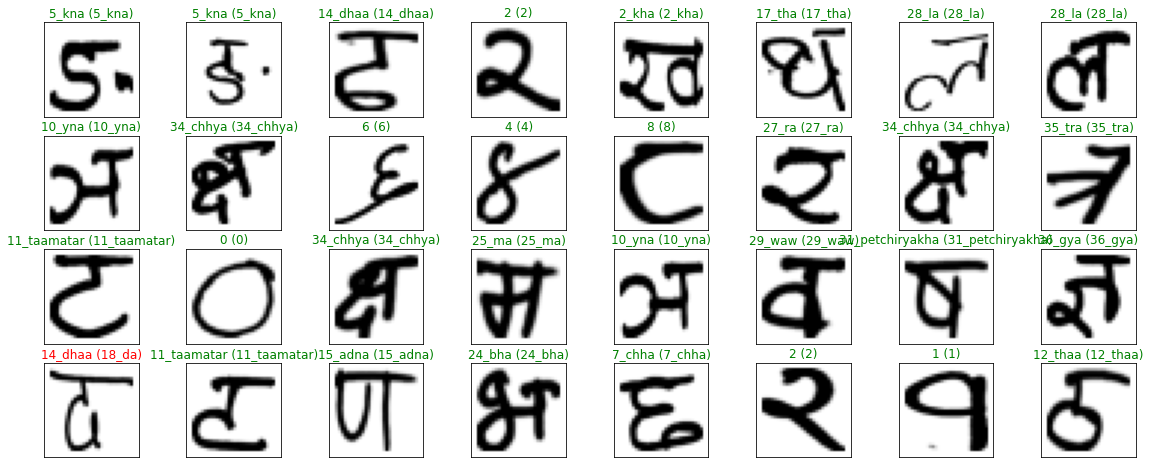

In [38]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_test):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]), cmap='binary')
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(classes[pred_idx], classes[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## Future Work
- Create a **Validation dataset** from the available training dataset.
- Implement **Model Checkpointing** and Model Saving
- Try **Image Augmentation** to be ready for worse handwritings in real world scenario.

- Try to reduce the Model parameters without sacrificing accuracy. 
*Reason:* In order to deploy this trained model in an offline setting (or web browsers), the offline app would need to download the pretrained model weights. In such scenario it would help to reduce size of model